In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

print("Ready!")

Ready!


In [12]:
df = pd.read_csv('health_data.csv', sep=';')

In [13]:
df.describe()

,id,health,age,female,married,income
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,3.436000,50.376000,0.510000,0.590000,2760.838000
std,144.481833,1.163017,17.768006,0.500401,0.492326,1660.131808
min,1.000000,1.000000,18.000000,0.000000,0.000000,315.000000
25%,125.750000,3.000000,38.000000,0.000000,0.000000,1600.000000
50%,250.500000,4.000000,51.000000,1.000000,1.000000,2500.000000
75%,375.250000,4.000000,64.000000,1.000000,1.000000,3500.000000
max,500.000000,5.000000,94.000000,1.000000,1.000000,12000.000000


In [14]:
df['educ'] = df['educ'].str.replace(',', '.').astype(float)

X = df[['age', 'educ', 'female', 'married', 'income']]
X = sm.add_constant(X)
y = df['health']

model1 = sm.OLS(y, X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 health   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     16.69
Date:                Thu, 26 Feb 2026   Prob (F-statistic):           2.99e-15
Time:                        12:27:55   Log-Likelihood:                -745.45
No. Observations:                 500   AIC:                             1503.
Df Residuals:                     494   BIC:                             1528.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7059      0.250     14.811      0.0

In [15]:
df['age2'] = df['age'] ** 2

X2 = df[['age', 'age2', 'educ', 'female', 'married', 'income']]
X2 = sm.add_constant(X2)

model2 = sm.OLS(y, X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 health   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     14.89
Date:                Thu, 26 Feb 2026   Prob (F-statistic):           1.13e-15
Time:                        12:27:55   Log-Likelihood:                -742.85
No. Observations:                 500   AIC:                             1500.
Df Residuals:                     493   BIC:                             1529.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3702      0.385     11.364      0.0

In [16]:
age = 40
marginal_effect = model2.params['age'] + 2 * model2.params['age2'] * age
print(f"Marginal effect of age at 40: {marginal_effect:.4f}")

Marginal effect of age at 40: -0.0309


In [17]:
df['ln_income'] = np.log(df['income'])

X3 = df[['age', 'age2', 'educ', 'female', 'married', 'ln_income']]
X3 = sm.add_constant(X3)

model3 = sm.OLS(y, X3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                 health   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     16.01
Date:                Thu, 26 Feb 2026   Prob (F-statistic):           7.39e-17
Time:                        12:27:56   Log-Likelihood:                -739.96
No. Observations:                 500   AIC:                             1494.
Df Residuals:                     493   BIC:                             1523.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2269      0.800      2.784      0.0

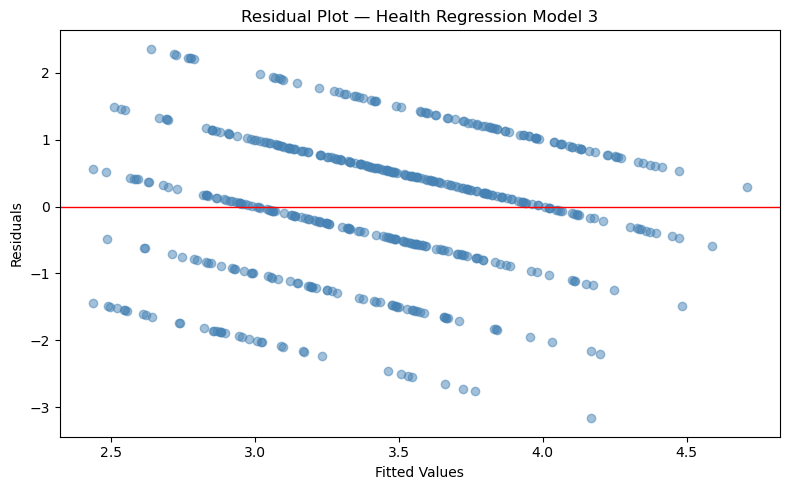

In [18]:
plt.figure(figsize=(8, 5))
plt.scatter(model3.fittedvalues, model3.resid, alpha=0.5, color='steelblue')
plt.axhline(0, color='red', linewidth=1)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot — Health Regression Model 3')
plt.tight_layout()
plt.show()

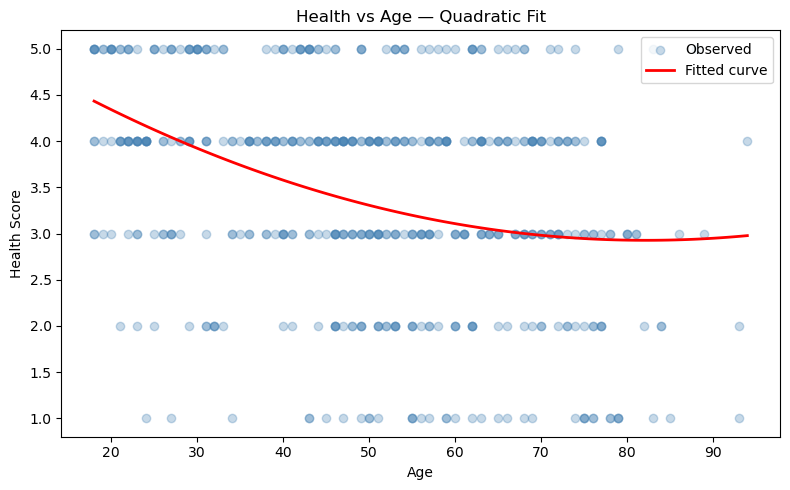

In [19]:
plt.figure(figsize=(8, 5))
plt.scatter(df['age'], df['health'], alpha=0.3, color='steelblue', label='Observed')
age_range = np.linspace(df['age'].min(), df['age'].max(), 100)
health_pred = model2.params['const'] + model2.params['age']*age_range + model2.params['age2']*age_range**2 + model2.params['educ']*df['educ'].mean() + model2.params['female']*0.5 + model2.params['married']*0.5 + model2.params['income']*df['income'].mean()
plt.plot(age_range, health_pred, color='red', linewidth=2, label='Fitted curve')
plt.xlabel('Age')
plt.ylabel('Health Score')
plt.title('Health vs Age — Quadratic Fit')
plt.legend()
plt.tight_layout()
plt.show()